In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from snAPI.Main import *
import pandas as pd
sys.path.append("../")
from HH import HH_T3
from Functions import *

In [2]:
def GetPos(filename):
    parts=filename[:-4].split('_')
    x=float(parts[1])
    y=float(parts[2])
    return x,y
def GetGatedCounts(filename,T):
    sn.getDevice()
    sn.getFileDevice(filename)
    sn.initDevice(MeasMode.T3)
    t_resol=sn.deviceConfig['Resolution']/1000 #in ns
    sn.raw.measure()
    data = sn.raw.getData()
    channels=sn.raw.channel(data)
    dTimes=sn.raw.dTime_T3(data)*t_resol
    sn.closeDevice()
    print(dTimes)
    return np.size(dTimes)

In [3]:
def ImageData(pathtoPTUs,gate):
    arr=np.array([0,0,0])
    for file in os.listdir(pathtoPTUs):
        if file[0:3]=='PTU':
            x,y=GetPos(file)
            c=GetGatedCounts(pathtoPTUs+file,gate)
            print(c)
            arr=np.vstack((arr,[x,y,c]))
    arr=np.delete(arr,0,0)
    return arr

In [4]:
filename='../../../Acquisition2/Data/Trial/PTU_6.ptu'
os.listdir(filename)

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '../../../Acquisition2/Data/Trial/PTU_6.ptu'

In [5]:
sn=snAPI()

In [6]:
sn.getFileDevice(filename)
sn.initDevice(MeasMode.T3)
t_resol=sn.deviceConfig['Resolution']/1000 #in ns
sn.raw.measure()
data = sn.raw.getData()
channels=sn.raw.channel(data)
dTimes=sn.raw.dTime_T3(data)[np.where(channels!=64)]*t_resol
dataChannels=channels[np.where(channels!=64)]

In [7]:
data

array([], dtype=uint32)

In [8]:
pathtoPTUs='../../../Acquisition2/Data/Trial/'

In [9]:
#os.listdir('../../../Acquisition/Acquisition2/Data/Trial/')

In [10]:
d=ImageData(pathtoPTUs,0)

[84.224 68.096 69.888 ... 68.352 69.376 69.12 ]
300207
[68.608 68.096 69.632 ... 67.84  81.152 77.056]
302535
[68.096 72.192 69.376 ... 68.352 70.144 68.608]
300327
[81.92  69.632 70.4   ... 73.728 67.584 67.584]
299634
[70.656 72.96  76.032 ... 69.632 74.752 72.192]
298874
[67.84  70.912 67.072 ... 74.752 67.84  73.728]
302236
[70.656 67.584 73.472 ... 71.68  78.848 68.608]
302575
[67.584 68.352 72.704 ... 69.632 68.096 70.912]
300608
[67.328 67.328 68.864 ... 70.4   72.448 68.608]
297203
[68.352 67.584 68.864 ... 72.96  68.608 68.352]
299257
[68.096 67.84  67.84  ... 72.96  70.144 70.144]
303969
[69.376 68.608 70.656 ... 72.192 68.352 71.168]
304191
[73.216 67.328 70.4   ... 80.896 71.168 76.544]
298571
[68.352 68.864 68.352 ... 70.656 69.376 70.656]
301568
[67.328 69.12  76.8   ... 68.096 72.96  75.52 ]
302800
[77.568 68.608 69.888 ... 72.704 78.336 73.728]
299383
[71.424 78.336 68.096 ... 74.496 68.096 72.96 ]
299494
[72.192 79.36  69.12  ... 67.328 67.84  68.864]
302376
[68.096 67

In [11]:
d.T[2]

array([300207., 302535., 300327., 299634., 298874., 302236., 302575.,
       300608., 297203., 299257., 303969., 304191., 298571., 301568.,
       302800., 299383., 299494., 302376., 295130., 302369., 304435.,
       302439., 299869., 305729., 299857., 302595., 301336., 304101.,
       302869., 303362., 295404., 297870., 299998., 294790., 299616.,
       297162., 297757., 295152., 295011., 290369., 300780., 299852.,
       299558., 300396., 289442., 302962., 301846., 298228., 303016.,
       298943., 293069., 294151., 292001., 286515., 290875., 284727.,
       293079., 289798., 289907., 285787., 288655., 288320., 282768.,
       281133., 283908., 291591., 291439., 284109., 290489., 288338.,
       287477., 284584., 285249., 280529., 287620., 288509., 286163.,
       279302., 287203., 284565., 294247., 291100., 294535., 286307.,
       294645., 291126., 290321., 293582., 294877., 292558., 279585.,
       279299., 275506., 280723., 274186., 279876., 281414., 280132.,
       282206., 2827

In [12]:
xs=np.unique(d.T[0])
ys=np.unique(d.T[1])
m=np.zeros((np.size(xs),np.size(ys)))
for point in d:
    ind_x=np.where(xs==point[0])[0][0]
    ind_y=np.where(ys==point[1])[0][0]
    m[ind_x,ind_y]=point[2]   

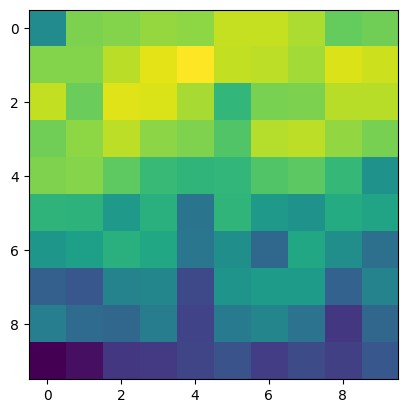

In [13]:
plt.imshow(m)